In [1]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [18]:
df = df_raw.copy()

In [20]:
df = df[df['G_ratio']==25]
# df = df[df['drift_model'] == 'log']
# df = df[df['inf_time'] == 1]
df = df[df['pgm_noise_scale'] == 1]
# df_mlp = df[df['model'] == 'MLP']
df_res = df[df['model'] == 'Resnet18']
df_res = df_res[df_res['GDC'] == 'on']

In [4]:
# df_mlp = df[df['model'] == 'MLP']
# df_res = df[df['drift_model'] == 'Resnet18']

In [21]:
df_res

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
2540,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,91.169998,0.434792
2541,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,10,91.176994,0.402577
2542,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,100,90.531998,0.725302
2543,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,1000,89.672997,0.537899
2544,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,3600,88.875000,0.827583
2545,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,10000,88.158997,0.787042
2546,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,86400,85.066002,1.168067
2547,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,10000000,71.496002,1.783649
2548,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,100000000,61.650002,1.687963
2549,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,log,default,default,25,10,1000000000,46.900002,1.551795


In [23]:
df_res['IOparameter'].unique()
# df_res['pruning'].unique()

array(['non-ideal'], dtype=object)

In [24]:
df_mlp_log = df_mlp[df_mlp['drift_model'] == 'log']
# df_mlp_001 = df_mlp[df_mlp['drift_model'] == 0.01]

df_res_log = df_res[df_res['drift_model'] == 'log']

In [14]:
df_test = df_res_log[(df_mlp_log['pruning'] == 0.3) | (df_mlp_log['pruning'] == '-')]
df_test['p_retrain_IO'] = df_test['pruning'].astype(str) + '_' + df_test['retrain'] + '_' + df_test['IOparameter'] 
df_test

/tmp/ipykernel_568/3676248742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['p_retrain_IO'] = df_test['pruning'].astype(str) + '_' + df_test['retrain'] + '_' + df_test['IOparameter']


,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,...,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std,p_retrain_IO
2490,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,1,95.857002,std,0.3_X_non-ideal
2491,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,10,95.716995,std,0.3_X_non-ideal
2492,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,100,95.059006,std,0.3_X_non-ideal
2493,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,1000,93.852005,std,0.3_X_non-ideal
2494,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,3600,93.257996,std,0.3_X_non-ideal
2495,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,10000,92.362000,std,0.3_X_non-ideal
2496,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,86400,90.750000,std,0.3_X_non-ideal
2497,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,10000000,85.180008,std,0.3_X_non-ideal
2498,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,100000000,81.495995,std,0.3_X_non-ideal
2499,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,...,1,log,default,default,25,10,1000000000,77.936996,std,0.3_X_non-ideal


In [10]:
pivot_index = list(df_raw.columns[0:18]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index.remove('IOparameter')
pivot_index.remove('retrain')
pivot_index

['model',
 'dataset',
 'device',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'G_ratio',
 'inf_time']

In [15]:
df_pivot = df_test.pivot_table(index=pivot_index, columns='p_retrain_IO', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns
df_pivot

p_retrain_IO,model,dataset,device,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,0.3_X_non-ideal
0,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,1,95.857002
1,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,10,95.716995
2,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,100,95.059006
3,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,1000,93.852005
4,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,3600,93.257996
5,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,10000,92.362000
6,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,86400,90.750000
7,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,10000000,85.180008
8,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,100000000,81.495995
9,MLP,MNIST,PCMPresetUnitCell,on,1,TestNoiseModel,1,1,1,25,1000000000,77.936996


KeyError: '0.3_O_ideal'

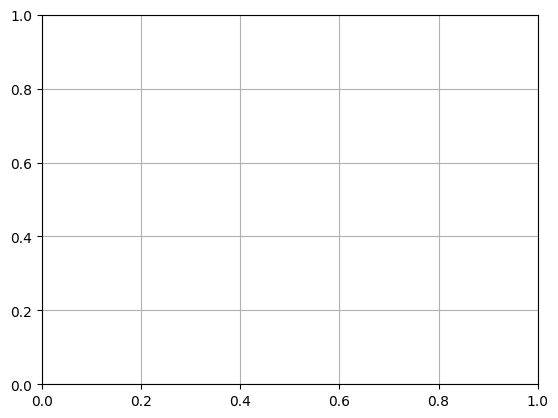

In [16]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

# plt.plot(x,df_pivot['-_X_ideal'], marker='o', linestyle = '-', label = 'vanilla_ideal-IO', linewidth=2, color='k')
# plt.plot(x,df_pivot['0.3_X_ideal'], marker='o', linestyle = '-', label = 'pruned_ideal-IO', linewidth=2)
plt.plot(x,df_pivot['0.3_O_ideal'], marker='o', linestyle = '-', label = 'retrained_ideal-IO', linewidth=2, color='darkorange')

plt.plot(x,df_pivot['-_X_non-ideal'], marker='o', linestyle = '-', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_X_non-ideal'], marker='o', linestyle = '-', label = 'pruned', linewidth=2, color='b')
# plt.plot(x,df_pivot['0.3_O_non-ideal'], marker='o', linestyle = '-', label = 'retrained', linewidth=2)

plt.title("MLP / p=0.3 ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.5))
plt.xlabel('Time [sec]',fontsize=14)  
plt.ylabel('Inference accuracy [%]', fontsize=14) #, fontweight='demi'
# plt.xticks(fontsize/14)

# plt.ylim(60,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

In [93]:
df_test = df_mlp_001[(df_mlp_001['pruning'] == 0.3) | (df_mlp_001['pruning'] == '-')]
df_test['p_retrain_IO'] = df_test['pruning'].astype(str) + '_' + df_test['retrain'] + '_' + df_test['IOparameter']

/tmp/ipykernel_26301/2040927659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['p_retrain_IO'] = df_test['pruning'].astype(str) + '_' + df_test['retrain'] + '_' + df_test['IOparameter']


In [94]:
df_pivot = df_test.pivot_table(index=pivot_index, columns='p_retrain_IO', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns
df_pivot

p_retrain_IO,model,dataset,device,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,-_X_ideal,-_X_non-ideal,0.3_O_ideal,0.3_O_non-ideal,0.3_X_ideal,0.3_X_non-ideal
0,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,1,97.449997,94.441002,95.416000,34.515999,97.420006,95.850998
1,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,10,97.490005,94.749008,95.679001,34.342003,97.475998,95.723991
2,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,100,97.460007,94.548996,95.084999,33.843998,97.447998,95.514008
3,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,1000,97.363998,94.076004,95.569992,31.535999,97.373001,95.216003
4,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,3600,97.366989,94.616989,92.784996,31.454000,97.359001,95.227997
5,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,10000,97.358994,93.959000,94.740997,31.461002,97.319992,94.926003
6,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,86400,97.336990,93.296005,94.478004,30.859003,97.320000,94.729004
7,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,10000000,97.055000,92.988007,95.697998,27.126999,97.055992,93.934998
8,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,100000000,96.889999,92.684998,90.715004,26.413998,96.882004,93.181999
9,MLP,MNIST,PCMPresetUnitCell,off,1,TestNoiseModel,1,1,1,25,1000000000,96.808006,91.685997,92.143997,26.366999,96.791008,92.933998


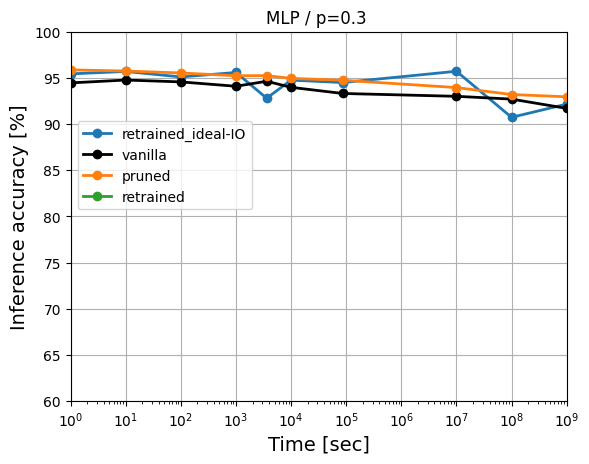

In [ ]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_ideal'], marker='o', linestyle = '-', label = 'vanilla_ideal-IO', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_X_ideal'], marker='o', linestyle = '-', label = 'pruned_ideal-IO', linewidth=2)
plt.plot(x,df_pivot['0.3_O_ideal'], marker='o', linestyle = '-', label = 'retrained_ideal-IO', linewidth=2)

plt.plot(x,df_pivot['-_X_non-ideal'], marker='o', linestyle = '-', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_X_non-ideal'], marker='o', linestyle = '-', label = 'pruned', linewidth=2)
plt.plot(x,df_pivot['0.3_O_non-ideal'], marker='o', linestyle = '-', label = 'retrained', linewidth=2)

plt.title("MLP / p=0.3 ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.5))
plt.xlabel('Time [sec]',fontsize=14)  
plt.ylabel('Inference accuracy [%]', fontsize=14) #, fontweight='demi'
# plt.xticks(fontsize/14)

# plt.ylim(60,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()